In [43]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

df_registry = pd.read_csv("../data/clean_registry.csv")
df_cases = pd.read_csv("../data/clean_cases.csv")
df_pop = pd.read_csv("../data/clean_pop.csv")
df_beer = pd.read_csv("../data/beer-consumption-per-person.csv")

In [169]:
plt.style.use('ggplot')

## Data Munging

In [110]:
df_beer.columns = ['Entity','Code','Year','Consumption']

In [44]:
def df_by_registry(df):
    '''
    aggregate data by registry and remove not important columns
    '''
    df_new = df.groupby('REGISTRY').sum().iloc[:,2:].reset_index()
    return df_new
    
def annualize_case_data(df_cases):
    '''
    annualze data by dividing by 5 as we have 5 years of data
    '''
    df_cases['TOTAL_CASES'] = df_cases['TOTAL'] / 5
    df_cases['N0_14'] = df_cases['N0_14'] / 5
    df_cases['N15_29'] = df_cases['N15_29'] / 5
    df_cases['N30_44'] = df_cases['N30_44'] / 5
    df_cases['N45_64'] = df_cases['N45_64'] / 5
    df_cases['N65'] = df_cases['N65'] / 5
    return df_cases

def annualize_pop_data(df_pop):
    '''
    annualze data by dividing by 5 as we have 5 years of data
    '''
    df_pop['TOTAL_POP'] = df_pop['TOTAL'] / 5
    df_pop['P0_14'] = df_pop['P0_14'] / 5
    df_pop['P15_29'] = df_pop['P15_29'] / 5
    df_pop['P30_44'] = df_pop['P30_44'] / 5
    df_pop['P45_64'] = df_pop['P45_64'] / 5
    df_pop['P65'] = df_pop['P65'] / 5
    return df_pop

def munge_cases(df_cases):
    df_cases_1 = df_by_registry(df_cases)
    df_cases_new = annualize_case_data(df_cases_1)
    return df_cases_new
    
def munge_pop(df_pop):
    df_pop_1 = df_by_registry(df_pop)
    df_pop_new = annualize_pop_data(df_pop_1)
    return df_pop_new

def combine_data(df_cases,df_pop,df_registry):
    df_cases_new = munge_cases(df_cases)
    df_pop_new = munge_pop(df_pop)
    df_pop_reg = df_pop_new.merge(df_registry, on = 'REGISTRY',suffixes=('', '_reg'))
    df_combo = df_pop_reg.merge(df_cases_new, on = 'REGISTRY',suffixes=('', '_cases'))
    return df_combo

In [45]:
df_combo = combine_data(df_cases,df_pop,df_registry)

In [46]:
df_combo.drop(['TOTAL','country_long','star','is_national','is_national_exists','is_subset','TOTAL_cases'],axis = 1, inplace = True)

In [205]:
df_combo['Incidence Per Capita'] = df_combo['TOTAL_CASES'] / df_combo['TOTAL_POP']

In [206]:
df_combo.head()

,REGISTRY,P0_14,P15_29,P30_44,P45_64,P65,TOTAL_POP,country_region,country_name,N0_14,N15_29,N30_44,N45_64,N65,TOTAL_CASES,Incidence Per Capita
0,101200399,338603.0,380581.0,221287.4,156217.6,58953.8,1155642.8,"Algeria, Batna",Algeria,73.2,150.2,389.0,900.6,793.4,2306.4,0.001996
1,140400299,951003.0,1210213.0,700362.0,238030.0,35190.0,3134798.0,"Kenya, Nairobi",Kenya,270.2,450.2,1320.4,2276.0,1379.6,5696.4,0.001817
2,169000099,15823.6,17052.6,17238.2,14990.0,5497.8,70602.2,Seychelles,Seychelles,2.4,10.2,28.6,162.8,173.8,377.8,0.005351
3,171000199,434720.2,299955.2,131712.4,134614.2,72407.0,1073409.0,"South Africa, Eastern Cape",South Africa,36.6,95.6,309.6,779.8,792.8,2014.4,0.001877
4,171600270,288098.6,304815.0,187895.2,74049.2,18448.0,873306.0,"Zimbabwe, Harare: African",Zimbabwe,106.8,214.2,805.8,1120.0,984.8,3397.8,0.003891


#### Country Level & Incidence rate

In [49]:
#aggregate by country & add incidence rate
#average annualized data from 2008-2012
df_combo_country = df_combo.groupby('country_name').sum().iloc[:,1:].reset_index()
df_combo_country['Incidence Per Capita'] = df_combo_country['TOTAL_CASES'] / df_combo_country['TOTAL_POP']

In [136]:
df_combo_country.head()

,country_name,P0_14,P15_29,P30_44,P45_64,P65,TOTAL_POP,N0_14,N15_29,N30_44,N45_64,N65,TOTAL_CASES,Incidence Per Capita
0,Algeria,338603.0,380581.0,221287.4,156217.6,58953.8,1155642.8,73.2,150.2,389.0,900.6,793.4,2306.4,0.001996
1,Argentina,1363473.2,1362708.8,995826.8,955536.4,476624.2,5154169.4,505.8,1072.2,3325.0,14384.2,19659.6,38946.8,0.007556
2,Australia,4999918.4,5577377.0,5553157.8,6588836.2,3567685.4,26286974.8,2321.8,7039.8,26538.8,149071.2,240196.4,425168.0,0.016174
3,Austria,1242177.8,1570187.8,1820801.4,2260183.4,1474437.2,8367787.6,552.6,1666.8,6745.8,38611.2,69033.6,116610.0,0.013936
4,Bahrain,180708.6,161927.0,110782.4,92510.2,23760.8,569689.0,61.2,86.6,234.4,715.2,545.8,1643.2,0.002884


## Insights from Data

In [106]:
#top 10 countries with the highest incidence rate
df_plot_top_10 = df_combo_country.sort_values('Incidence Per Capita',ascending = False).head(10)

Text(0.5, 1.0, 'Cancer Incidence p/Capita (2008-2012) - Top 10 Countries')

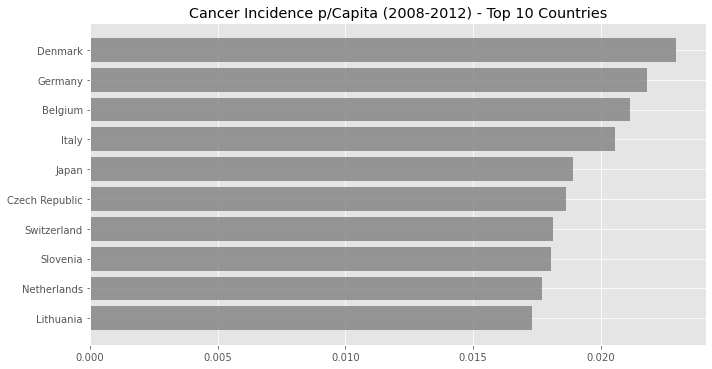

In [185]:
fig, ax = plt.subplots(figsize=(10,5))
x = df_plot_top_10['country_name']
y = df_plot_top_10['Incidence Per Capita']
ax.barh(x,y, alpha = 0.8, color = 'grey')
ax.invert_yaxis()
#ax.set_xticks(x)
#ax.set_xticklabels(df_plot_top_10['country_name'],rotation = 60)
#ax.set_ylabel('Cancer Incidence p/Capita')
fig.tight_layout()
ax.set_title('Cancer Incidence p/Capita (2008-2012) - Top 10 Countries')

In [87]:
#incidence rate for five continents
df_na = df_combo_country[df_combo_country['country_name'].isin(['United States','Canada','Costa Rica','Jamaica'])]
df_we = df_combo_country[df_combo_country['country_name'].isin(['Belgium','Denmark','France','Germany','Iceland','Ireland','Italy','Netherlands','Norway','Portugal','Spain','Switzerland','United Kingdom'])]
df_ee = df_combo_country[df_combo_country['country_name'].isin(['Austria','Belarus','Bulgaria','Croatia','Czech Republic','Estonia','Lithuania','Poland','Russian Federation','Slovenia','Ukraine'])]
df_sa = df_combo_country[df_combo_country['country_name'].isin(['Argentina','Brazil','Chile','Colombia','Ecuador','Peru','Uruguay'])]
df_asia = df_combo_country[df_combo_country['country_name'].isin(['China','India','Japan','Malaysia','Philippines','Sounth Korea','Thailand','Viet Nam'])]
df_africa = df_combo_country[df_combo_country['country_name'].isin(['Algeria','Kenya','South Africa','Uganda'])]

In [94]:
print(df_na['TOTAL_CASES'].sum()/df_na['TOTAL_POP'].sum())
print(df_we['TOTAL_CASES'].sum()/df_we['TOTAL_POP'].sum())
print(df_ee['TOTAL_CASES'].sum()/df_ee['TOTAL_POP'].sum())
print(df_sa['TOTAL_CASES'].sum()/df_sa['TOTAL_POP'].sum())
print(df_asia['TOTAL_CASES'].sum()/df_asia['TOTAL_POP'].sum())
print(df_africa['TOTAL_CASES'].sum()/df_africa['TOTAL_POP'].sum())
print(df_combo_country['TOTAL_CASES'].sum()/df_combo_country['TOTAL_POP'].sum())

0.014602426678548662
0.01768465539225183
0.012794195311719114
0.007220337031638623
0.009299164374037211
0.001945002053826044
0.014226249303042771


In [95]:
df_plot_geo = pd.DataFrame({
    'Continent': ['Northern America','Western Europe','Eastern Europe','South America','Asia','Africa','World'],
    'Incidence Per Capita': [0.0146,0.0177,0.0128,0.0072,0.0093,0.0019,0.0142]
})

Text(0.5, 1.0, 'Cancer Incidence p/Capita (2008-2012)')

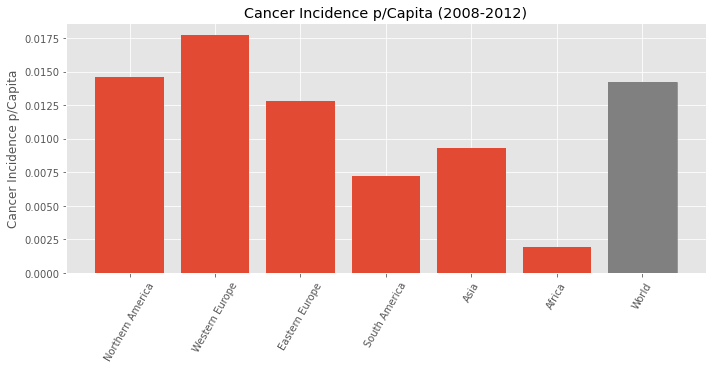

In [187]:
fig, ax = plt.subplots(figsize=(10,5))
x = df_plot_geo['Continent']
y = df_plot_geo['Incidence Per Capita']
ax.bar(x,y,color = 'grey')
barlist = ax.bar(x,y)
barlist[-1].set_color('grey')
ax.set_xticks(x)
ax.set_xticklabels(df_plot_geo['Continent'],rotation = 60)
ax.set_ylabel('Cancer Incidence p/Capita')
fig.tight_layout()
ax.set_title('Cancer Incidence p/Capita (2008-2012)')

In [111]:
df_beer.sort_values('Consump')

,Entity,Code,Year,Consumption
0,Afghanistan,AFG,1961,0.0
1,Afghanistan,AFG,1962,0.0
2,Afghanistan,AFG,1963,0.0
3,Afghanistan,AFG,1964,0.0
4,Afghanistan,AFG,1965,0.0


In [112]:
Denmark = df_beer[df_beer['Entity'] == 'Denmark']
Germany = df_beer[df_beer['Entity'] == 'Germany']
Belgium = df_beer[df_beer['Entity'] == 'Belgium']
Italy = df_beer[df_beer['Entity'] == 'Italy']
Japan = df_beer[df_beer['Entity'] == 'Japan']
Czech = df_beer[df_beer['Entity'] == 'Czech Republic']
Switzerland = df_beer[df_beer['Entity'] == 'Switzerland']
Slovenia = df_beer[df_beer['Entity'] == 'Slovenia']
Netherlands = df_beer[df_beer['Entity'] == 'Netherlands']
Lithuania = df_beer[df_beer['Entity'] == 'Lithuania']

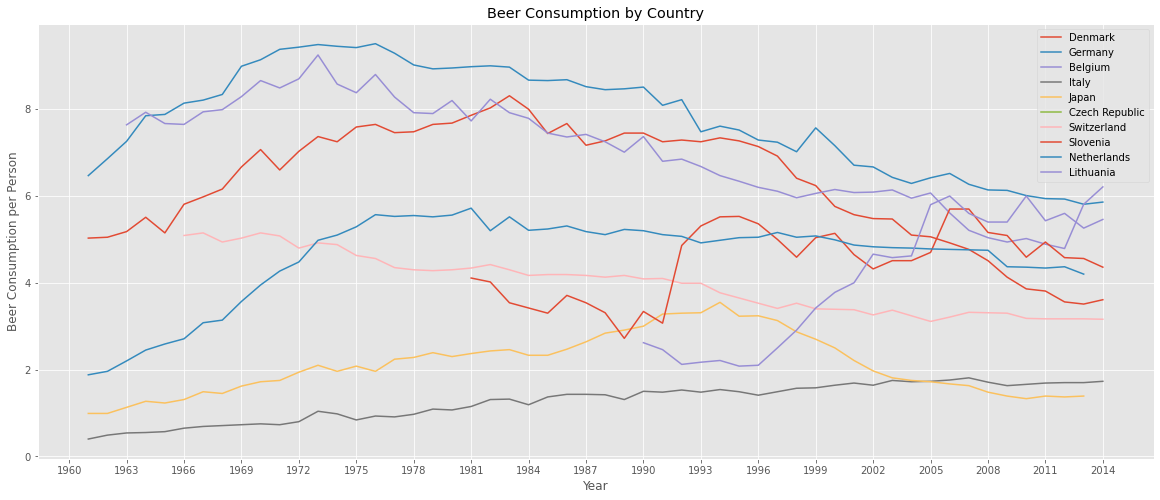

In [190]:
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(Denmark['Year'],Denmark['Consumption'],label = 'Denmark')
ax.plot(Germany['Year'],Germany['Consumption'],label = 'Germany')
ax.plot(Belgium['Year'],Belgium['Consumption'],label = 'Belgium')
ax.plot(Italy['Year'],Italy['Consumption'],label = 'Italy')
ax.plot(Japan['Year'],Japan['Consumption'],label = 'Japan')
ax.plot(Czech['Year'],Czech['Consumption'],label = 'Czech Republic')
ax.plot(Switzerland['Year'],Switzerland['Consumption'],label = 'Switzerland')
ax.plot(Slovenia['Year'],Slovenia['Consumption'],label = 'Slovenia')
ax.plot(Netherlands['Year'],Netherlands['Consumption'],label = 'Netherlands')
ax.plot(Lithuania['Year'],Lithuania['Consumption'],label = 'Lithuania')
ax.set_title('Beer Consumption by Country')
ax.set_xlabel('Year')
ax.set_ylabel('Beer Consumption per Person')
ax.legend()

x_ticks = np.arange(df_beer['Year'].min(), df_beer['Year'].max(), 3)
ax.set_xticks(x_ticks)

In [126]:
df_test = df_beer.groupby('Entity').sum().iloc[:,0].reset_index()['Entity']

In [127]:
for i in range(len(df_test)):
    print(df_test[i])

Afghanistan
Albania
Algeria
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Cape Verde
Central African Republic
Chad
Chile
China
Colombia
Comoros
Congo
Cook Islands
Costa Rica
Cote d'Ivoire
Croatia
Cuba
Cyprus
Czechia
Democratic Republic of Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Grenada
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Maldives
Mali
Malta
Mauritania
Mauritius
Mexico
Micronesia (country)
Moldo

In [150]:
for i in range(len(df_combo_country['country_name'])):
    print(df_combo_country['country_name'][i])

Algeria
Argentina
Australia
Austria
Bahrain
Belarus
Belgium
Brazil
Brunei
Bulgaria
Canada
Chile
China
Colombia
Costa Rica
Croatia
Cyprus
Czechia
Denmark
Ecuador
Estonia
France
French Guiana
Germany
Iceland
India
Iran
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kenya
Kuwait
Latvia
Lithuania
Malaysia
Malta
Netherlands
New Caledonia
New Zealand
Norway
Peru
Philippines
Poland
Portugal
Qatar
Russia
Saudi Arabia
Seychelles
Slovakia
Slovenia
Sounth Korea
South Africa
Spain
Switzerland
Thailand
Turkey
Uganda
Ukraine
United Kingdom
United States
Uruguay
Vietnam
Zimbabwe


In [ ]:
#cancer type
#age group

## Combine Cancer data and Beer data

In [145]:
df_beer_08 = df_beer[df_beer['Year'] == 2008]

In [165]:
def std_country_name(col):
    dict = {
        'Brunei Darussalam': 'Brunei',
        'Czech Republic': 'Czechia',
        'Russian Federation': 'Russia',
        'Viet Nam': 'Vietnam'
    }
    if (dict.get(col) == None):
        return col
    else:
        return dict.get(col)
    
def identify_continent(col):
#     dict = {
#         'Northern America': ['United States','Canada','Costa Rica','Jamaica'],
#         'Western Europe': ['Belgium','Denmark','France','Germany','Iceland','Ireland','Italy','Netherlands','Norway','Portugal','Spain','Switzerland','United Kingdom'],
#         'Eastern Europe': ['Austria','Belarus','Bulgaria','Croatia','Czechia','Estonia','Lithuania','Poland','Russia','Slovenia','Ukraine'],
#         'South America': ['Argentina','Brazil','Chile','Colombia','Ecuador','Peru','Uruguay'],
#         'Asia': ['China','India','Japan','Malaysia','Philippines','Sounth Korea','Thailand','Vietnam'],
#         'Africa': ['Algeria','Kenya','South Africa','Uganda']
#     }
    if col in ['United States','Canada','Costa Rica','Jamaica']:
        return 'Northern America'
    elif col in ['Belgium','Denmark','France','Germany','Iceland','Ireland','Italy','Netherlands','Norway','Portugal','Spain','Switzerland','United Kingdom']:
        return 'Western Europe'
    elif col in ['Austria','Belarus','Bulgaria','Croatia','Czechia','Estonia','Lithuania','Poland','Russia','Slovenia','Ukraine']:
        return 'Eastern Europe'
    elif col in ['Argentina','Brazil','Chile','Colombia','Ecuador','Peru','Uruguay']:
        return 'South America'
    elif col in ['China','India','Japan','Malaysia','Philippines','Sounth Korea','Thailand','Vietnam']:
        return 'Asia'
    elif col in ['Algeria','Kenya','South Africa','Uganda']:
        return 'Africa'
    else:
        return 'NA'

In [149]:
df_combo_country['country_name'] = list(map(std_country_name,df_combo_country['country_name']))

In [207]:
df_combo['country_name'] = list(map(std_country_name,df_combo['country_name']))

In [151]:
##combine cancer data and beer data (country level)
df_stats = df_combo_country.merge(df_beer_08,how = 'inner', left_on = 'country_name',right_on = 'Entity',suffixes=['','_exists'])
df_stats['Continent'] = list(map(identify_continent,df_stats['country_name']))

In [210]:
##combine cancer data and beer data (registry level)
df_stats_reg = df_combo.merge(df_beer_08,how = 'left', left_on = 'country_name',right_on = 'Entity',suffixes=['','_exists'])
df_stats_reg['Continent'] = list(map(identify_continent,df_stats_reg['country_name']))

In [167]:
df_stats.head()

,country_name,P0_14,P15_29,P30_44,P45_64,P65,TOTAL_POP,N0_14,N15_29,N30_44,N45_64,N65,TOTAL_CASES,Incidence Per Capita,Entity,Code,Year,Consumption,Continent
0,Algeria,338603.0,380581.0,221287.4,156217.6,58953.8,1155642.8,73.2,150.2,389.0,900.6,793.4,2306.4,0.001996,Algeria,DZA,2008,0.20,Africa
1,Argentina,1363473.2,1362708.8,995826.8,955536.4,476624.2,5154169.4,505.8,1072.2,3325.0,14384.2,19659.6,38946.8,0.007556,Argentina,ARG,2008,3.16,South America
2,Australia,4999918.4,5577377.0,5553157.8,6588836.2,3567685.4,26286974.8,2321.8,7039.8,26538.8,149071.2,240196.4,425168.0,0.016174,Australia,AUS,2008,4.69,NA
3,Austria,1242177.8,1570187.8,1820801.4,2260183.4,1474437.2,8367787.6,552.6,1666.8,6745.8,38611.2,69033.6,116610.0,0.013936,Austria,AUT,2008,6.40,Eastern Europe
4,Bahrain,180708.6,161927.0,110782.4,92510.2,23760.8,569689.0,61.2,86.6,234.4,715.2,545.8,1643.2,0.002884,Bahrain,BHR,2008,0.47,NA


In [168]:
df_stats.to_csv(r'/Users/chun/Galvanize/capstones/capstone1-time-spleeping-cancer-correlation/data/combo_final.csv',index = False, header = True)

In [214]:
df_stats_reg.to_csv(r'/Users/chun/Galvanize/capstones/capstone1-time-spleeping-cancer-correlation/data/combo_reg_final.csv',index = False, header = True)

In [193]:
df_stats[df_stats['Continent'] == 'Northern America']['Consumption'].mean()

3.2074999999999996

In [192]:
np.average(df_stats[df_stats['Continent'] == 'Northern America']['Consumption'], weights = df_stats[df_stats['Continent'] == 'Northern America']['TOTAL_POP'],axis = 0)

4.531551785877295

In [194]:
#incidence rate for five continents
df_na_1 = df_stats[df_stats['Continent'] == 'Northern America']
df_we_1 = df_stats[df_stats['Continent'] == 'Western Europe']
df_ee_1 = df_stats[df_stats['Continent'] == 'Eastern Europe']
df_sa_1 = df_stats[df_stats['Continent'] == 'South America']
df_asia_1 = df_stats[df_stats['Continent'] == 'Asia']
df_africa_1 = df_stats[df_stats['Continent'] == 'Africa']

In [197]:
print(np.average(df_na_1['Consumption'], weights = df_na_1['TOTAL_POP'],axis = 0))
print(np.average(df_we_1['Consumption'], weights = df_we_1['TOTAL_POP'],axis = 0))
print(np.average(df_ee_1['Consumption'], weights = df_ee_1['TOTAL_POP'],axis = 0))
print(np.average(df_sa_1['Consumption'], weights = df_sa_1['TOTAL_POP'],axis = 0))
print(np.average(df_asia_1['Consumption'], weights = df_asia_1['TOTAL_POP'],axis = 0))
print(np.average(df_africa_1['Consumption'], weights = df_africa_1['TOTAL_POP'],axis = 0))
print(np.average(df_stats['Consumption'], weights = df_stats['TOTAL_POP'],axis = 0))

4.531551785877295
4.353131544353921
4.470229369470876
2.8068952929615723
1.1324185598229666
1.1781752612071554
4.223280513612876


In [198]:
df_plot_geo_1 = pd.DataFrame({
    'Continent': ['Northern America','Western Europe','Eastern Europe','South America','Asia','Africa','World'],
    'Beer Consumption per Person': [4.5316,4.3531,4.4702,2.8069,1.1324,1.1782,4.2233]
})

Text(0.5, 1.0, 'Beer Consumption per Person (2008)')

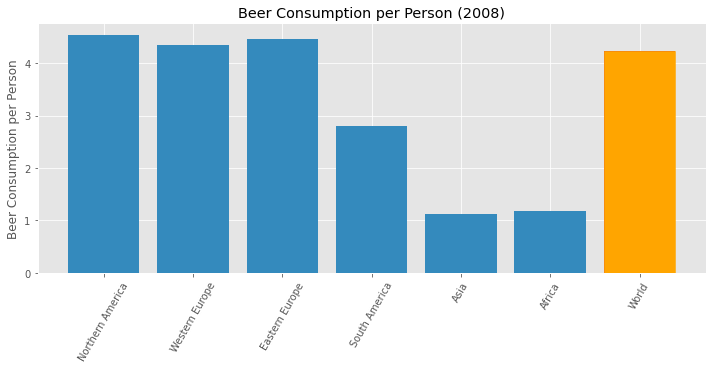

In [202]:
fig, ax = plt.subplots(figsize=(10,5))
x = df_plot_geo_1['Continent']
y = df_plot_geo_1['Beer Consumption per Person']
ax.bar(x,y)
barlist = ax.bar(x,y)
barlist[-1].set_color('orange')
ax.set_xticks(x)
ax.set_xticklabels(df_plot_geo_1['Continent'],rotation = 60)
ax.set_ylabel('Beer Consumption per Person')
fig.tight_layout()
ax.set_title('Beer Consumption per Person (2008)')